  <a id='top'></a>
 # odtcalc  : expérience helium1
 
 

In [2]:
# -- global imports
import sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as csts
import skimage
from numpy import pi
from heliumtools import odtcalc
from heliumtools.atom import Helium
from heliumtools.odtcalc.laser import GaussianBeam
from heliumtools.odtcalc.trap import Trap
he = Helium()
# -- setup matplotlib
%matplotlib inline 
plt.rcParams.update({'font.size': 12})


>> horizontal
 + depth = 465 nK
 + f_rad = 73.3 Hz
 + f_ax  = 189 mHz
------------------------------
>> vertical
 + depth = 23.5 µK
 + f_rad = 1.65 kHz
 + f_ax  = 13.6 Hz
------------------------------
Contours : 
[ 0.          4.74049664  9.48099328 14.22148992 18.96198656 23.7024832 ]


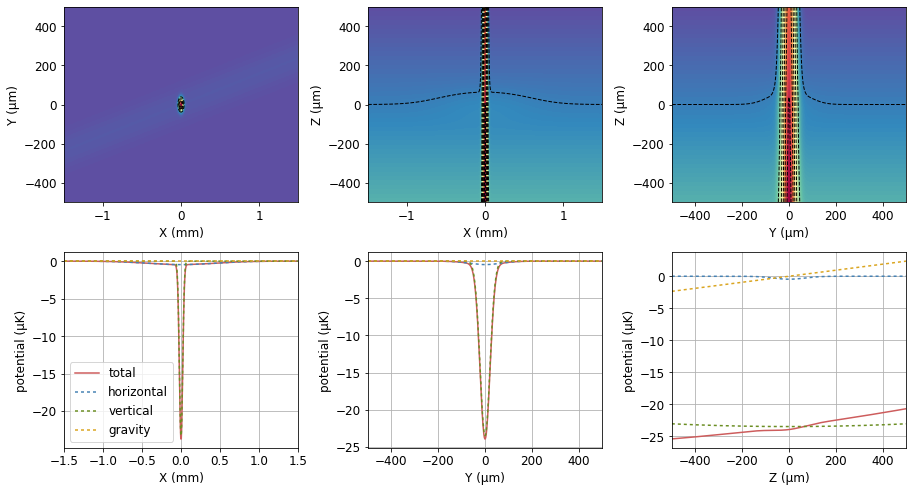

In [15]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertial_power = 0.5
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertial_power,
         'theta': 0 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

beamH = {'waist_value': 135e-6,
         'power': 0.1 ,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': 9 * pi / 180,
         'waist_position':(0,0,0),
         'label': 'horizontal'}

odt = Trap(atom=Helium())  

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

# -- setup trap
odt.add_laser(**beamH)
odt.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

## Fit du waist
En diminuant la puissance du faisceau vertical, le nuage tombe vers le bas et de sa position, on peut récupérer le waist du faisceau (NB : le fit se fait 'à la main' ci-dessous).

No value for 0.572222222


/home/victor/VirtualEnv/vikenv/lib/python3.9/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/victor/VirtualEnv/vikenv/lib/python3.9/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


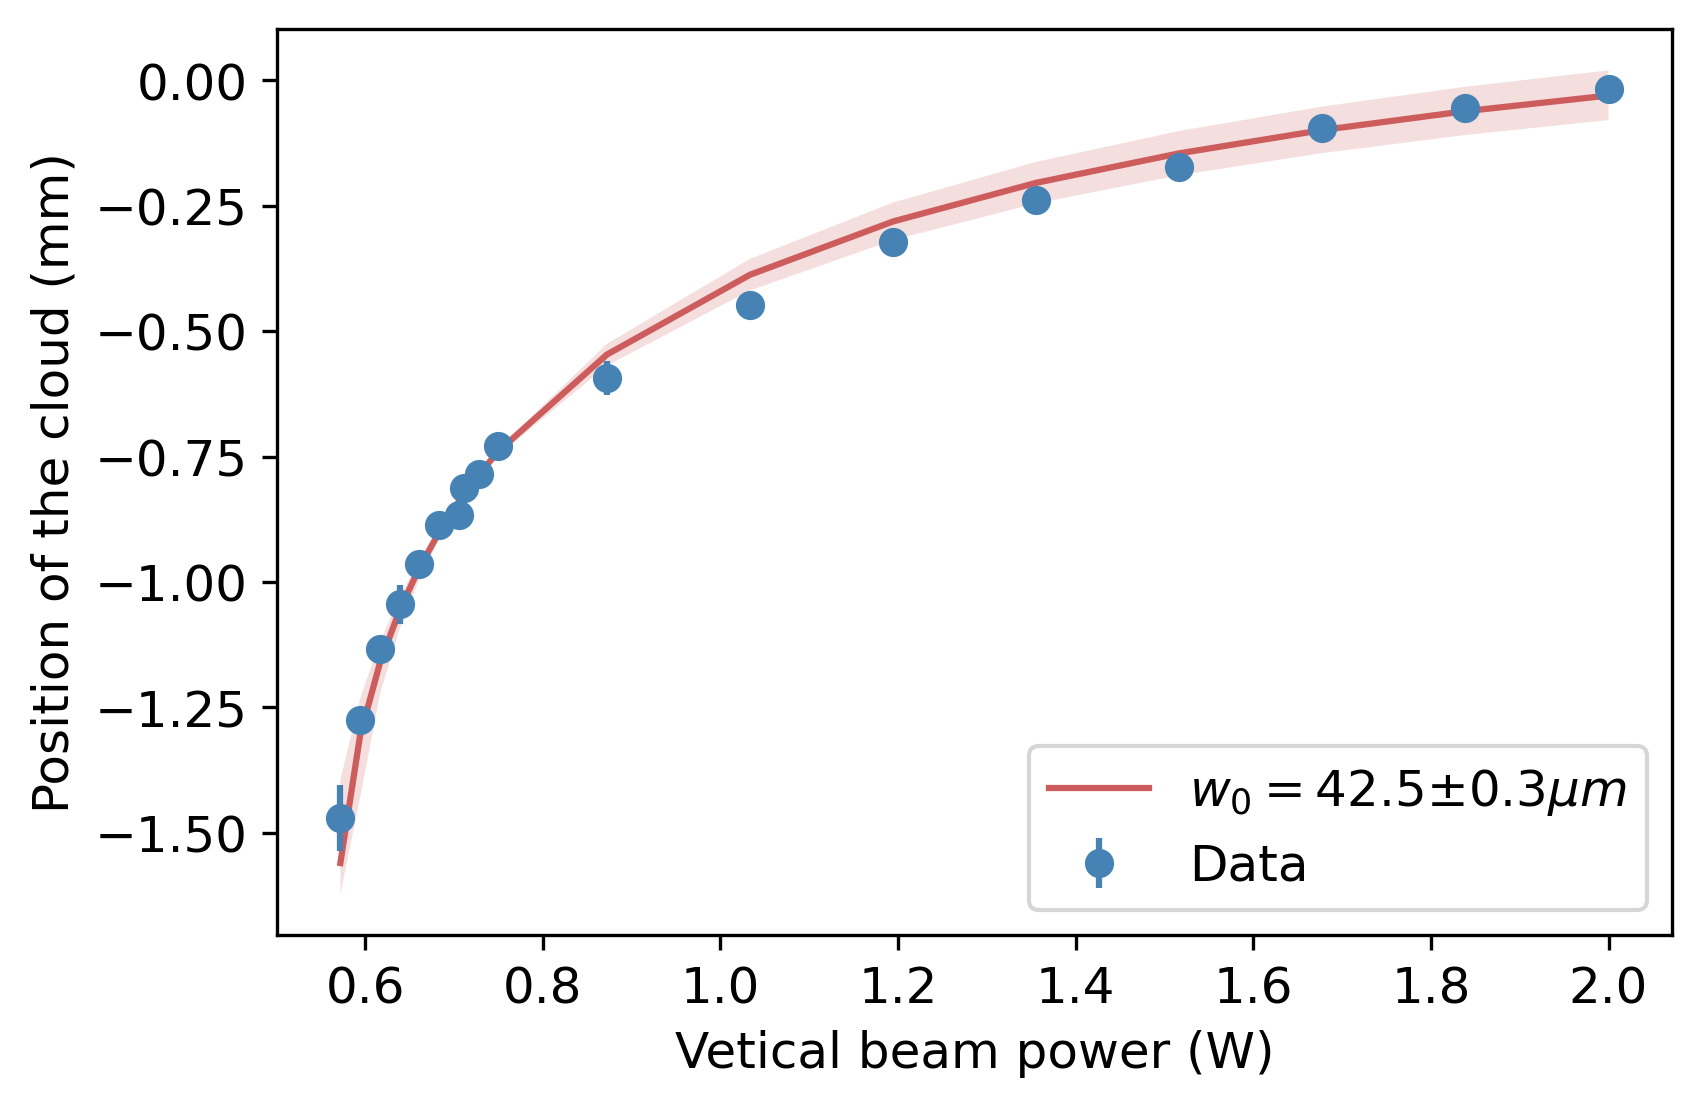

In [8]:
from heliumtools.odtcalc.trap import Trap
from heliumtools.atom import Helium
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy import pi
import pandas as pd
from numpy import genfromtxt
#### Parameters of the code : 
waist_value = 42.5e-6  # waist du faisceau en mètres
u_waist_value = 0.3e-6


### LOAD EXPERIMENTAL DATA
## Data : 
data = [[ 5.22883942e+00, 8.72222222e-01,1.56514789e+04], [ 4.84680661e+00,1.03333333e+00,1.55753012e+04],[ 4.76145333e+00,1.19444444e+00,1.54935712e+04],[ 4.44575296e+00,1.35555556e+00,1.54327615e+04],
[ 4.20842461e+00,1.51666667e+00,1.53898054e+04],[ 4.24815920e+00,1.67777778e+00,1.53230171e+04],[ 4.24778334e+00,1.83888889e+00,1.52888464e+04],[ 4.32185958e+00,2.00000000e+00,1.52665281e+04],
[ 7.99440635e+00,5.50000000e-01,1.65002340e+04],[ 5.83242962e+00,7.11111111e-01,1.58322732e+04],[ 4.97892699e+00,8.72222222e-01,1.56997432e+04],[ 5.01987259e+00,1.03333333e+00,1.55842913e+04],
[ 4.71448295e+00,1.19444444e+00,1.54921903e+04],[ 4.61381091e+00,1.35555556e+00,1.54193620e+04],[ 4.27934557e+00,1.51666667e+00,1.53803063e+04],[ 4.25331581e+00,1.67777778e+00,1.53337724e+04],
[ 4.15954869e+00,1.83888889e+00,1.52948342e+04],[ 4.20425854e+00,2.00000000e+00,1.52814598e+04],[ 8.16390236e+00,5.50000000e-01,1.65520534e+04],[ 5.94639368e+00,7.11111111e-01,1.58315345e+04],
[ 5.07290987e+00,8.72222222e-01,1.56774220e+04],[ 4.87937458e+00,1.03333333e+00,1.55616854e+04],[ 4.65317830e+00,1.19444444e+00,1.54665851e+04],[ 4.57331745e+00,1.35555556e+00,1.54253912e+04],
[ 4.32337812e+00,1.51666667e+00,1.53660308e+04],[ 4.35476420e+00,1.67777778e+00,1.53155437e+04],[ 4.10139548e+00,1.83888889e+00,1.53012268e+04],[ 4.11695438e+00,2.00000000e+00,1.52565456e+04],
[ 6.09383543e+00,6.38888889e-01,1.59754324e+04],[ 6.19368645e+00,6.16666667e-01,1.60526706e+04],[ 6.18470315e+00,5.94444444e-01,1.61692955e+04],[ 6.51686920e+00,5.72222222e-01,1.63298723e+04],
[ 7.25946028e+00,5.50000000e-01,1.65523031e+04],[ 5.67323178e+00,7.50000000e-01,1.57717108e+04],[ 5.88171979e+00,7.27777778e-01,1.58111124e+04],[ 6.02539714e+00,7.05555556e-01,1.58687301e+04],
[ 6.00933352e+00,6.83333333e-01,1.58830601e+04],[ 6.17150044e+00,6.61111111e-01,1.59378077e+04],[ 6.17246691e+00,6.38888889e-01,1.60142511e+04],[ 6.35101707e+00,6.16666667e-01,1.60627186e+04],
[ 6.79122625e+00,5.94444444e-01,1.61469737e+04],[ 6.81760445e+00,5.72222222e-01,1.62641445e+04],[ 7.43792659e+00,5.50000000e-01,1.65027282e+04]]
df0 = pd.DataFrame(
    data=data, index=None, columns=["cy_err", "power", "cy"]
)
df0["cy"] = df0["cy"] - np.min(df0["cy"])
df0 = df0[df0["power"] > 0.555]
df = df0.groupby(["power"]).mean()
df3 = df0.groupby(["power"]).std()
df["cy_err"] = df3["cy"]
df["cy_err"] = df["cy_err"] * np.sqrt(2)
df["cy"] = df["cy"] * np.sqrt(2) * (-1)
# df = df.sort_values(["power", "cy"])
df = df.reset_index(drop=False)

### COMPUTE THEORETICAL POSITION OF THE TRAP FOR GIVEN WAIST
def obtain_position(
    df,
    waist_value,
):
    import numpy as np

    theoretical_position = np.zeros(len(df))
    for index, power in enumerate(df["power"]):
        # -- setup trap
        # init trap object
        odt = Trap(atom=Helium())  # NB: atom is Helium by default
        odt.add_laser(
            wavelength=1550e-9,  # meters
            power=power,  # Watts
            waist_value=waist_value,  # meters
            waist_position=(0, 0, 0),  # x, y, z
            waist_shift=0,  # to define a shift along the laser axis
            phi=0,  # angle of propagation in x/y plane
            theta=0,  # angle of propagation, wrt z axis
            label="Vertical laser Beam",
        )
        # trap general settings
        # enables gravity (True by default)
        odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

        z = np.linspace(-8e-3, 0, 100000)
        U, indiv = odt.potential(0, 0, z, yield_each_contribution=True, unit="µK")
        import numpy as np
        from scipy.signal import argrelextrema

        arg = argrelextrema(U, np.less)
        if arg[0].size > 0:
            theoretical_position[index] = z[arg[0][0]] * 1e6  # en micrometres
        else:
            print("No value for {}".format(power))
            theoretical_position[index] = -2000

    theoretical_position = theoretical_position - np.max(theoretical_position)
    theoretical_position += np.mean(df["cy"] - theoretical_position)
    return theoretical_position


theoretical_position = obtain_position(df, waist_value)
theoretical_position_up = obtain_position(df, waist_value + u_waist_value)
theoretical_position_down = obtain_position(df, waist_value - u_waist_value)
# plt.errorbar(x=df["power"], y=df["cy"], yerr=df["cy_err"], fmt="o")
# plt.show()
my_palette = [ "indianred","steelblue","olivedrab","goldenrod","darkslategrey",]
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", my_palette)
plt.figure(dpi=300)
# Plot theory

# Plot error
maxi = np.min([len(theoretical_position_up), len(theoretical_position_down)])
plt.fill_between(
    df["power"],
    theoretical_position_up / 1000,
    theoretical_position_down / 1000,
    alpha=0.2,
)
# plot data
plt.plot(
    df["power"],
    theoretical_position / 1000,
    label=r"$w_0=${}$\pm ${}$\mu m$".format(waist_value * 1e6, u_waist_value * 1e6),
)
plt.errorbar(
    x=df["power"], y=df["cy"] / 1000, yerr=df["cy_err"] / 1000, fmt="o", label="Data"
)

plt.xlabel("Vetical beam power (W)")
plt.ylabel(r"Position of the cloud (mm)")
plt.legend()
plt.show()

# Piège à 7 degré

>> vertical
 + depth = 187 µK
 + f_rad = 4.68 kHz
 + f_ax  = 38.4 Hz
------------------------------
Contours : 
[  0.          37.17881054  74.35762108 111.53643162 148.71524216
 185.8940527 ]


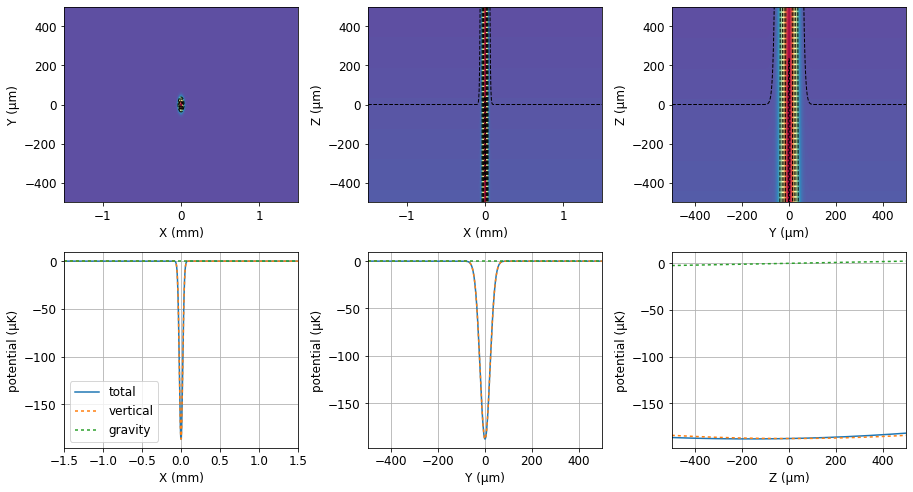

In [5]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertial_power = 4
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertial_power,
         'theta': 0 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

odt = Trap(atom=Helium())  

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset

# -- setup trap
odt.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> vertical
 + depth = 187 µK
 + f_rad = 4.68 kHz
 + f_ax  = 38.4 Hz
------------------------------
Contours : 
[  0.          37.17942437  74.35884875 111.53827312 148.71769749
 185.89712187]


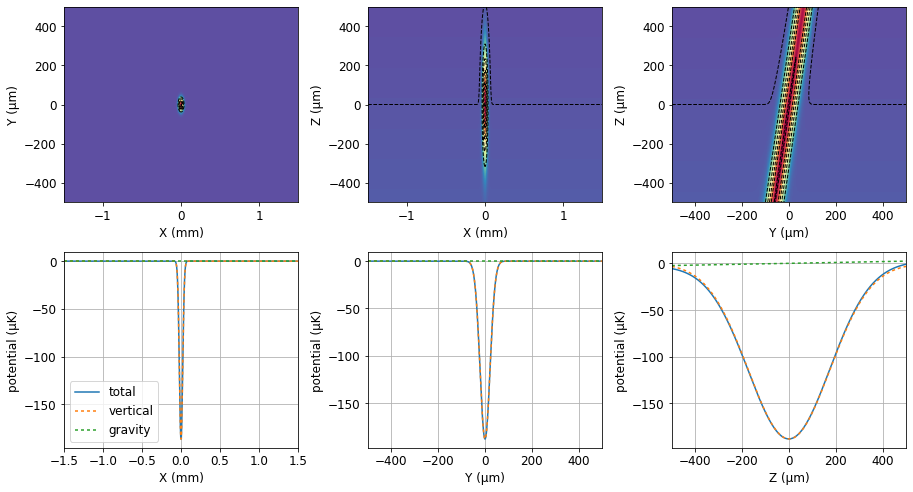

In [6]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertial_power = 4
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertial_power,
         'theta': 7 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}
odt = Trap(atom=Helium())  

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset
# -- setup trap
odt.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> horizontal
 + depth = 465 nK
 + f_rad = 73.3 Hz
 + f_ax  = 189 mHz
------------------------------
>> vertical
 + depth = 23.5 µK
 + f_rad = 1.65 kHz
 + f_ax  = 13.6 Hz
------------------------------
Contours : 
[ 0.          4.74057337  9.48114674 14.22172011 18.96229348 23.70286685]


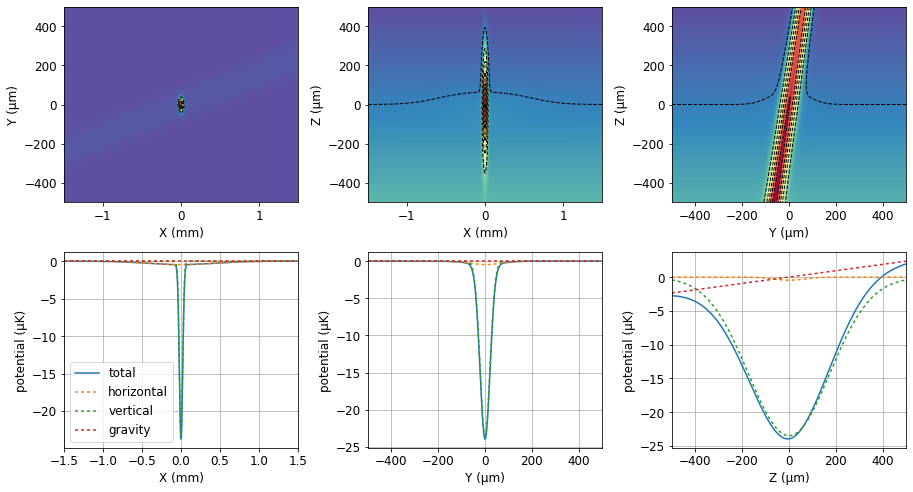

In [11]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertical_power = 0.5
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertical_power,
         'theta': 7 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

beamH = {'waist_value': 135e-6,
         'power': 0.1 ,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': 9 * pi / 180,
         'waist_position':(0,0,0),
         'label': 'horizontal'}

odt7degres = Trap(atom=Helium())  

# trap general settings
odt7degres.gravity = True  # enables gravity (True by default)
odt7degres.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset
# -- setup trap
odt7degres.add_laser(**beamH)
odt7degres.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt7degres.compute_theoretical_properties()
# plot potential
odt7degres.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> horizontal
 + depth = 465 nK
 + f_rad = 73.3 Hz
 + f_ax  = 189 mHz
------------------------------
>> vertical
 + depth = 23.5 µK
 + f_rad = 1.65 kHz
 + f_ax  = 13.6 Hz
------------------------------
Contours : 
[ 0.          4.74049664  9.48099328 14.22148992 18.96198656 23.7024832 ]


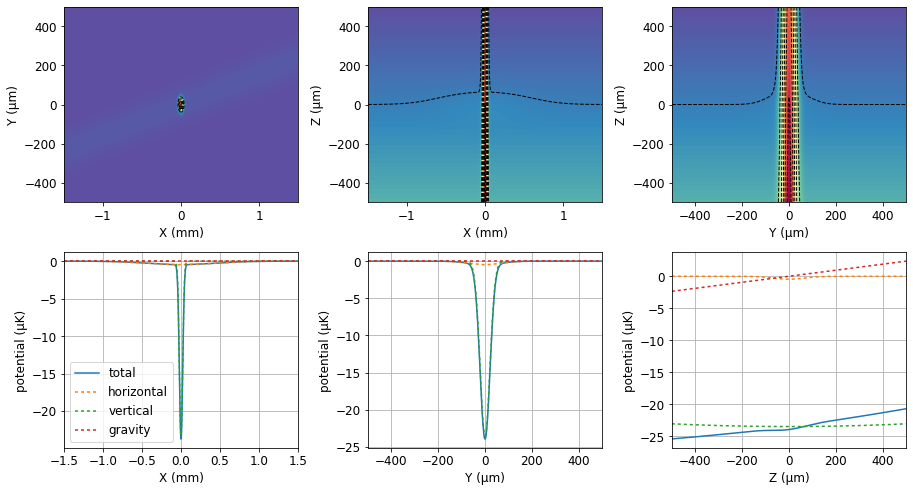

In [33]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertical_power = 0.5
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertical_power,
         'theta': 0 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

beamH = {'waist_value': 135e-6,
         'power': 0.1 ,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': 9 * pi / 180,
         'waist_position':(0,0,0),
         'label': 'horizontal'}

odt = Trap(atom=Helium())  

# trap general settings
odt.gravity = True  # enables gravity (True by default)
odt.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset
# -- setup trap
odt.add_laser(**beamH)
odt.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt.compute_theoretical_properties()
# plot potential
odt.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

>> horizontal
 + depth = 465 nK
 + f_rad = 73.3 Hz
 + f_ax  = 189 mHz
------------------------------
>> vertical
 + depth = 23.5 µK
 + f_rad = 1.65 kHz
 + f_ax  = 13.6 Hz
------------------------------
Contours : 
[ 0.          4.79814578  9.59629156 14.39443734 19.19258312 23.9907289 ]


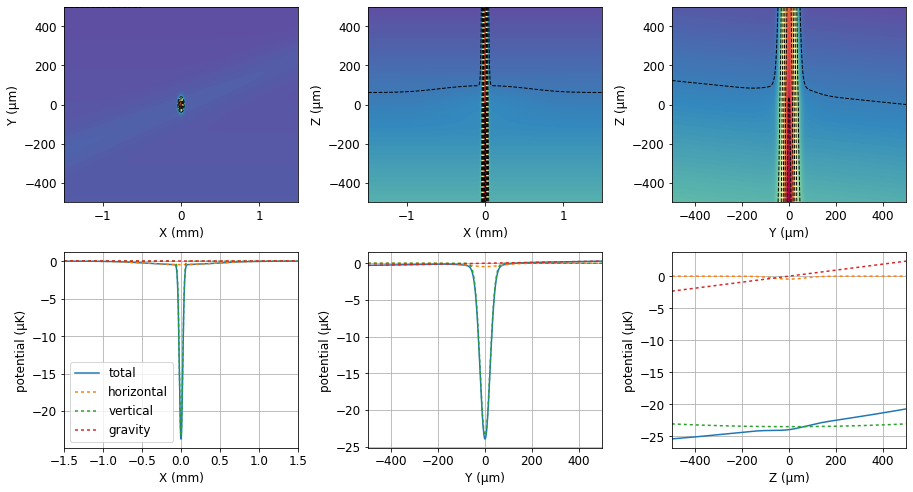

In [32]:
#X est l'axe pompe
#Y est l'axe Zeeman
# Z est la gravité
vertical_power = 0.5
vertical_waist = 42.5e-6

beamV = {'waist_value': vertical_waist,
         'power': vertical_power,
         'theta': 0 * pi / 180,  # i.e. in vertical plane
         'phi': pi/2,
         'label': 'vertical'}

beamH = {'waist_value': 135e-6,
         'power': 0.1 ,
         'theta': pi / 2,  # i.e. in horizontal plane
         'phi': 9 * pi / 180,
         'waist_position':(0,0,0),
         'label': 'horizontal'}

odt7bis = Trap7Degres(atom=Helium())  

# trap general settings
odt7bis.gravity = True  # enables gravity (True by default)
odt7bis.magnetic_field_offset = (0, 0, 0)  # homogeneous magnetic field offset
# -- setup trap
odt7bis.add_laser(**beamH)
odt7bis.add_laser(**beamV)
#odt.add_laser(**beamV2)
# -- analyze
# expected properties
odt7bis.compute_theoretical_properties()
# plot potential
odt7bis.plot_potential(spatial_range=(1.5e-3, 500e-6, 500e-6), figsize=(13,7))

In [34]:
z = np.linspace(-400e-6, 400e-6, 1000)

potential7degre = odt7degres.potential(np.zeros(1), np.zeros(1), z, yield_each_contribution=False, unit="µK")
potential0degre = odt.potential(np.zeros(1), np.zeros(1), z, yield_each_contribution=False, unit="µK")
potential7degrebis = odt7bis.potential(np.zeros(1), np.zeros(1), z, yield_each_contribution=False, unit="µK")

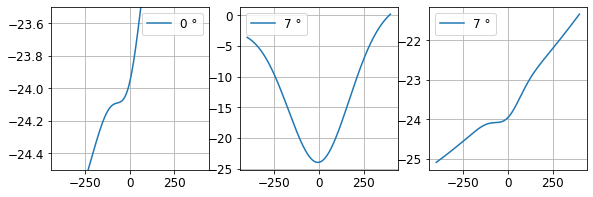

In [35]:
fig, axes = plt.subplots(ncols = 3, figsize = (3.2*3,3))
ax = axes[0]
ax.plot(z * 1e6, potential0degre, label = "0 °")
ax.set_ylim((-24.5, -23.5))
ax = axes[1]
ax.plot(z * 1e6, potential7degre, label = "7 °")
ax = axes[2]
ax.plot(z * 1e6, potential7degrebis, label = "7 °")
for ax in axes:
    ax.legend()
    ax.grid(True)

In [30]:
#!/usr/bin/env python3
# -*- mode: Python; coding: utf-8 -*-

"""
@Author: alex
@Date:   13 October 2020  @ 17:28
@Last modified by:   victor
@Last modified time: 19 January 2022 @ 14:07

Comment : implements the Trap class, used for the calculation of optical
           dipole traps potential
"""

# == imports
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy import constants as csts
from skimage.measure import find_contours
from scipy.optimize import brentq

# local
from heliumtools.atom import Helium
from heliumtools.odtcalc.laser import GaussianBeam
from heliumtools.odtcalc.coil import SingleCoil, CoilSet
from heliumtools.odtcalc.utils import (
    unit_mult,
    unit_str,
    polyval2D,
    polyfit2D,
    sortp,
    analyze_psort,
)


# == global variables
TITLE_STR = ">> %s"
VAL_STR = " + %s"
SEP_STR = "-" * 30


# == implement trap object
class Trap7Degres:
    """
    Defines pulse shapes (temporal)
    """

    def __init__(self, atom=Helium()):
        """
        Object initialization, sets parameters
        """
        self.atom = atom
        self.lasers = []
        self.coils = []
        self.gravity = True
        self.magnetic_field_offset = (0, 0, 0)  # Tesla

    # -- components handling (lasers, coils)
    def add_laser(self, **kwargs):
        new_laser = GaussianBeam(**kwargs)
        self.lasers.append(new_laser)

    def reset_lasers(self):
        self.lasers = []

    def add_coil(self, **kwargs):
        new_coil = SingleCoil(**kwargs)
        self.coils.append(new_coil)

    def add_coil_set(self, coils_settings=[], label=""):
        new_coil = CoilSet(coils_settings, label)
        self.coils.append(new_coil)

    def reset_coils(self):
        self.coils = []

    # -- potential calculation
    def potential(self, X, Y, Z, yield_each_contribution=False, unit="J"):
        # check inputs
        unit_factor = {
            "J": 1,
            "K": 1 / csts.k,
            "mK": 1e3 / csts.k,
            "µK": 1e6 / csts.k,
        }
        assert unit in unit_factor.keys()
        mult = unit_factor[unit]
        # some declarations
        potential = np.zeros_like(X * Y * Z, dtype=float)
        if yield_each_contribution:
            individual_potentials = {}
        # compute optical potential
        for beam in self.lasers:
            intensity = beam.intensity(X, Y, Z)
            alpha = self.atom.get_alpha(wavelength=beam.wavelength)
            new_potential = -0.5 / csts.epsilon_0 / csts.c * alpha * intensity
            new_potential *= mult
            potential += new_potential
            if yield_each_contribution:
                individual_potentials[beam.label] = new_potential

        # compute magenetic field potential
        # prepare
        Bx0, By0, Bz0 = self.magnetic_field_offset  # homogeneous offset
        Bxc, Byc, Bzc = self.magnetic_field_offset  # magnetic field at center
        Bx = np.zeros_like(X * Y * Z, dtype=float) + Bx0
        By = np.zeros_like(X * Y * Z, dtype=float) + By0
        Bz = np.zeros_like(X * Y * Z, dtype=float) + Bz0
        gJ = self.atom.lande_g_factor
        mJ = self.atom.zeeman_state
        mu_B = csts.value("Bohr magneton")
        # add contributions of all coils
        for coil in self.coils:
            bx, by, bz = coil.field(X, Y, Z, unit="T")
            bxc, byc, bzc = coil.field(0, 0, 0, unit="T")
            if yield_each_contribution:
                b = np.sqrt((bx + Bx0) ** 2 + (by + By0) ** 2 + (bz + Bz0) ** 2)
                bc = np.sqrt((bxc + Bx0) ** 2 + (byc + By0) ** 2 + (bzc + Bz0) ** 2)
                mag_potential = mult * gJ * mJ * mu_B * (b - bc)
                individual_potentials[coil.label] = mag_potential
            Bx += bx
            By += by
            Bz += bz
            Bxc += bxc
            Byc += byc
            Bzc += bzc
        # compute resulting potential
        B = np.sqrt(Bx**2 + By**2 + Bz**2)
        Bc = np.sqrt(Bxc**2 + Byc**2 + Bzc**2)  # at center
        magnetic_potential = gJ * mJ * mu_B * (B - Bc)
        potential += mult * magnetic_potential

        # add gravity
        if self.gravity:
            m = self.atom.mass
            gravity_potential = m * csts.g *( np.cos(7*pi/180) * Z  + np.sin(7*pi/180)* Y) + 0 * X
            potential += mult * gravity_potential
            if yield_each_contribution:
                individual_potentials["gravity"] = mult * gravity_potential
        # return
        if yield_each_contribution:
            return potential, individual_potentials
        else:
            return potential

    # -- analyze
    def _get_longer_name(self, res):
        n = 0
        for name in res.keys():
            if len(name) > n:
                n = len(name)
        return n

    def _print_results(self, results, skip_if_null=[], skip_name=[], skip_section=[]):
        for section, res in results.items():
            # skip
            if section in skip_section:
                continue
            # title
            print(TITLE_STR % section)
            # parameters
            n = self._get_longer_name(res)  # get longer name (to align)
            template = VAL_STR % ("{0:%i} = {1}" % n)  # set format
            for name, x in res.items():
                # special cases
                if name in skip_name:
                    continue
                if name in skip_if_null and x["val"] == 0:
                    continue
                value = unit_str(x["val"], prec=3, unit=x["unit"])
                print(template.format(name, value))
            # separator
            print(SEP_STR)

    def compute_theoretical_properties(self, print_result=True):
        """
        Computes and prints the theoretical properties (depth and frequencies)
        of each individual laser / coils.
        """
        results = {}
        # -- loop on lasers
        for beam in self.lasers:
            # - compute
            # beam parameters
            w0 = beam.waist_value  # waist (m)
            zR = np.pi * w0**2 / beam.wavelength  # Rayleigh length (m)
            P0 = beam.power  # power (W)
            I0 = 2 * P0 / np.pi / w0**2  # central intensity (W/m^2)
            # atomic parameters
            alpha = self.atom.get_alpha(beam.wavelength)  # polarizability
            m = self.atom.mass  # atomic mass (kg)
            # trap parameters
            U0 = 1 / 2 / csts.epsilon_0 / csts.c * alpha * I0  # trap depth (J)
            U0_K = U0 / csts.k  # trap depth (K)
            omega_rad = np.sqrt(4 * U0 / m / w0**2)  # radial trap freq.
            omega_ax = np.sqrt(2 * U0 / m / zR**2)  # axial trap freq.
            f_rad = omega_rad / 2 / pi
            f_ax = omega_ax / 2 / pi
            # - store
            r = {
                "depth": {"val": U0_K, "unit": "K"},
                "f_rad": {"val": f_rad, "unit": "Hz"},
                "f_ax": {"val": f_ax, "unit": "Hz"},
            }
            results[beam.label] = r

        # -- loop on coils
        for coil in self.coils:
            # - compute
            B0 = coil.field(0, 0, 0, unit="G")
            grad = {"x": 0, "y": 0, "z": 0}
            ax_list = {"xy": "z", "xz": "y", "yz": "x"}
            if isinstance(coil, CoilSet):
                for c in coil.coil_list:
                    ax = ax_list[c.plane.lower()]
                    z0 = c.axial_shift  # m
                    R = c.radius  # m
                    curr = c.current  # A
                    n = c.n_turns
                    Bmax = csts.mu_0 * curr * n / 2 / R  # T
                    Bc = Bmax * (1 + (z0 / R) ** 2) ** (-3 / 2)  # T
                    gradB = -3 * Bc * z0 / R**2 / (1 + (z0 / R) ** 2)  # T / m
                    gradB = gradB * 1e4 / 1e2  # G / cm
                    grad[ax] += gradB
            else:
                ax = ax_list[coil.plane.lower()]
                z0 = coil.axial_shift  # m
                R = coil.radius  # m
                curr = coil.current  # A
                n = coil.n_turns
                Bmax = csts.mu_0 * curr * n / 2 / R  # T
                Bc = Bmax * (1 + (z0 / R) ** 2) ** (-3 / 2)  # T
                gradB = -3 * Bc * z0 / R**2 / (1 + (z0 / R) ** 2)  # T / m
                gradB = gradB * 1e4 / 1e2  # G / cm
                grad[ax] += gradB

            # - store
            r = {
                "Bx0": {"val": B0[0], "unit": "G"},
                "By0": {"val": B0[1], "unit": "G"},
                "Bz0": {"val": B0[2], "unit": "G"},
                "grad_x": {"val": grad["x"], "unit": "G/cm"},
                "grad_y": {"val": grad["y"], "unit": "G/cm"},
                "grad_z": {"val": grad["z"], "unit": "G/cm"},
            }
            results[coil.label] = r

        # - reminder
        if self.coils:
            # compute
            gJ = self.atom.lande_g_factor
            mu_B = csts.value("Bohr magneton")
            B0 = 1e-4
            HZ_per_Gauss = gJ * mu_B * B0 / csts.h
            K_per_Gauss = gJ * mu_B * B0 / csts.k
            K_per_MHz = csts.h / csts.k * 1e6
            r = {
                "1G (1)": {"val": HZ_per_Gauss, "unit": "Hz"},
                "1G (2)": {"val": K_per_Gauss, "unit": "K"},
                "1MHz": {"val": K_per_MHz, "unit": "K"},
            }
            # store
            results["REMINDER"] = r

        # - print
        if print_result:
            self._print_results(results, skip_if_null=["grad_x", "grad_y", "grad_z"])

        return results

    def _istrapping(self, U0, U):
        """
        Determines whether the 2D potential U0 is trapping at level U
        It uses scikit-images find_countours() to check whether there is a
        closed contour at the level U. Returns 1 if trapping, -1 if not
        """
        # find contours
        contours = find_contours(U, U0)
        result = -1
        # look for a closed contour
        for c in contours:
            if np.all(c[0, :] == c[-1, :]):  # if contour is closed
                result = 1
                break
        return result

    def analyze_depth(
        self,
        spatial_range=(1.5e-3, 1e-3, 1e-3),
        Npoint=(1000, 1000, 1000),
        min_position=(0, 0, 0),
        unit="µK",
        plot_result=True,
        style2D={"cmap": "Spectral"},
        print_result=True,
        figsize=(12, 4),
    ):
        """
        Analyzes the trap potential to find its depth. The analysis is done on
        2D cuts, and is run three times, i.e. for the XY, XZ and YZ planes.
        The depth is determined using the _istrapping() method, i.e., by
        looking for a closed contour in the potential for a given energy.

        Parameters
        ----------
        spatial_range : tuple, optional
            spatial ranges (x,y,z) for the analysis, in meters
        Npoint : tuple, optional
            number of points for the (x,y,z) grids
        min_position : tuple, optional
            position of the trap minimum. center of the analysis area.
        unit : str, optional
            units for the potential : 'J', 'µK', 'mK', 'K'
        plot_result : bool, optional
            plot the results
        style2D : dict, optional
            style for 2D plot
        print_result : bool, optional
            prints the output of the analysis in the terminal

        Returns
        -------
        results : dictionnary
            dictionnary containing trap parameters with explicit names
        """
        # -- prepare grids
        # 1D
        x = {}
        for i, ax in enumerate(["x", "y", "z"]):
            x[ax] = np.linspace(-spatial_range[i], spatial_range[i], Npoint[i])
            x[ax] += min_position[i]
        # 2D grid
        XX = {}
        for cut in ["xy", "xz", "yz"]:
            XX[cut] = np.meshgrid(x[cut[0]], x[cut[1]])
        # potential
        UU = {}
        x0, y0, z0 = min_position
        UU["xy"] = self.potential(XX["xy"][0], XX["xy"][1], z0, unit=unit)
        UU["xz"] = self.potential(XX["xz"][0], y0, XX["xz"][1], unit=unit)
        UU["yz"] = self.potential(x0, XX["yz"][0], XX["yz"][1], unit=unit)
        # trap minimum
        Umin = self.potential(x0, y0, z0, unit=unit)

        # -- analyze
        results = {}
        for cut in ["xy", "xz", "yz"]:
            U = UU[cut]
            b = U.max()
            a = Umin + (b - Umin) * 1e-2
            if self._istrapping(a, U) == -1:
                Ulost = Umin
            elif self._istrapping(b, U) == 1:
                Ulost = b
                print("WARNING : could not find the depth in the %s cut" % cut)
                print(" you should increase the spatial range !")
            else:
                Ulost = brentq(self._istrapping, a, b, args=(U), rtol=0.001, xtol=0.001)

            r = {
                "Umin": {"val": Umin, "unit": unit},
                "Ulost": {"val": Ulost, "unit": unit},
                "depth": {"val": Ulost - Umin, "unit": unit},
            }
            results[cut.upper()] = r

        #  -- display
        if print_result:
            self._print_results(results)

        # -- plot
        if plot_result:
            fig, ax = plt.subplots(1, 3, figsize=figsize)
            for cax, cut in zip(ax, ["xy", "xz", "yz"]):
                # get grids and potential
                X = XX[cut][0]
                Y = XX[cut][1]
                xmult, xstr = unit_mult(X.max(), "m")
                ymult, ystr = unit_mult(Y.max(), "m")
                U = UU[cut]
                # plot potential
                pcm = cax.pcolormesh(
                    xmult * X, ymult * Y, U, vmin=U.min(), vmax=U.max(), **style2D
                )
                fig.colorbar(pcm, ax=cax)
                # plot escaping contour
                Ulost = results[cut.upper()]["Ulost"]["val"]
                contours = find_contours(U, Ulost)
                for c in contours:
                    cax.plot(
                        xmult * x[cut[0]][np.uint(c[:, 1])],
                        ymult * x[cut[1]][np.uint(c[:, 0])],
                        "k",
                    )
                # setup
                cax.set_title("potential (%s)" % unit)
                cax.set_xlabel("%s (%s)" % (cut[0].upper(), xstr))
                cax.set_ylabel("%s (%s)" % (cut[1].upper(), ystr))

            # show
            plt.tight_layout()
            plt.show()

        return results

    def analyze_freq(
        self,
        spatial_range=(60e-6, 20e-6, 20e-6),
        Npoint=(200, 200, 200),
        center=(0, 0, 0),
        unit="µK",
        plot_result=True,
        style2D={"cmap": "Spectral"},
        print_result=True,
        only_print_mean=False,
        figsize=(12, 4),
    ):
        """
        Analyzes the trap potential to find trap center, frequencies and
        eigenaxes. The analysis is done on 2D cuts, and is run three times,
        i.e. for the XY, XZ and YZ planes

        Parameters
        ----------
        spatial_range : tuple, optional
            spatial ranges (x,y,z) for the analysis, in meters
        Npoint : tuple, optional
            number of points for the (x,y,z) grids
        center : tuple, optional
            center of the area to analyze
        unit : str, optional
            units for the potential : 'J', 'µK', 'mK', 'K'
        plot_result : bool, optional
            plot the results
        style2D : dict, optional
            style for 2D plot
        print_result : bool, optional
            prints the output of the analysis in the terminal

        Returns
        -------
        results : dictionnary
            dictionnary containing trap parameters with explicit names
        """
        # -- prepare grids
        # 1D
        x = {}
        for i, ax in enumerate(["x", "y", "z"]):
            x[ax] = np.linspace(-spatial_range[i], spatial_range[i], Npoint[i])
            x[ax] += center[i]
        # 2D grid
        XX = {}
        for cut in ["xy", "xz", "yz"]:
            XX[cut] = np.meshgrid(x[cut[0]], x[cut[1]])
        # potential
        UU = {}
        x0, y0, z0 = center
        UU["xy"] = self.potential(XX["xy"][0], XX["xy"][1], z0, unit=unit)
        UU["xz"] = self.potential(XX["xz"][0], y0, XX["xz"][1], unit=unit)
        UU["yz"] = self.potential(x0, XX["yz"][0], XX["yz"][1], unit=unit)

        # -- analyze
        results = {}
        mean = {
            "freq_x": [],
            "freq_y": [],
            "freq_z": [],
            "x0": [],
            "y0": [],
            "z0": [],
            "U0": [],
        }
        for cut in ["xy", "xz", "yz"]:
            # 2D polynomial fit
            p = polyfit2D(XX[cut][0], XX[cut][1], UU[cut], n=4, print_full_res=False)
            p_sorted = sortp(p)
            # store 'raw' results
            results[cut + "_raw"] = analyze_psort(p_sorted, unit=unit, m=self.atom.mass)
            results[cut + "_raw"]["p"] = p
            results[cut + "_raw"]["ps"] = p_sorted
            # convert (for display)
            rr = results[cut + "_raw"]
            r = {}
            r["angle"] = {"val": rr["theta"], "unit": "rad"}
            r["freq_u (~%s)" % cut[0]] = {"val": rr["freq_u"], "unit": "Hz"}
            r["freq_v (~%s)" % cut[0]] = {"val": rr["freq_u"], "unit": "Hz"}
            r["U0"] = {"val": rr["U0"], "unit": unit}
            r["center %s" % cut[0]] = {"val": rr["x0"], "unit": "m"}
            r["center %s" % cut[1]] = {"val": rr["y0"], "unit": "m"}
            results[cut.upper()] = r
            # add to mean
            mean["freq_%s" % cut[0]].append(rr["freq_u"])
            mean["freq_%s" % cut[1]].append(rr["freq_v"])
            mean["%s0" % cut[0]].append(rr["x0"])
            mean["%s0" % cut[1]].append(rr["y0"])
            mean["U0"].append(rr["U0"])

        # -- mean
        r = {}
        for k in ["freq_x", "freq_y", "freq_z"]:
            fm = np.mean(mean[k])
            r[k] = {"val": fm, "unit": "Hz"}
        for k in ["x0", "y0", "z0"]:
            xm = np.mean(mean[k])
            r[k] = {"val": xm, "unit": "m"}
        r["U0"] = {"val": np.mean(mean["U0"]), "unit": unit}
        results["mean"] = r

        # -- print
        if print_result:
            skip_section = ["xy_raw", "xz_raw", "yz_raw"]
            if only_print_mean:
                for cut in ["xy", "xz", "yz"]:
                    skip_section.append(cut.upper())
            self._print_results(results, skip_section=skip_section)

        # -- plot
        if plot_result:
            for cut in ["xy", "xz", "yz"]:
                # - get grids and potentials
                X = XX[cut][0]
                Y = XX[cut][1]
                xmult, xstr = unit_mult(X.max(), "m")
                ymult, ystr = unit_mult(Y.max(), "m")

                U = UU[cut]
                Ufit = polyval2D(X, Y, results[cut + "_raw"]["p"])
                err = U - Ufit
                errmax = np.max(np.abs(err))
                theta = results[cut + "_raw"]["theta"]
                x0 = results[cut + "_raw"]["x0"]
                y0 = results[cut + "_raw"]["y0"]
                # - plot
                # figure
                fig, ax = plt.subplots(1, 3, figsize=figsize)
                # potential
                pcm = ax[0].pcolormesh(
                    xmult * X, ymult * Y, U, vmin=U.min(), vmax=U.max(), **style2D
                )
                fig.colorbar(pcm, ax=ax[0])
                ax[0].set_title("potential (%s)" % unit)
                # fit
                pcm = ax[1].pcolormesh(
                    xmult * X, ymult * Y, Ufit, vmin=U.min(), vmax=U.max(), **style2D
                )
                fig.colorbar(pcm, ax=ax[1])
                ax[1].set_title("fit (%s)" % unit)
                # error
                pcm = ax[2].pcolormesh(
                    xmult * X, ymult * Y, err, vmin=-errmax, vmax=errmax, cmap="RdBu_r"
                )
                fig.colorbar(pcm, ax=ax[2])
                ax[2].set_title("error (%s)" % unit)

                # decorations
                for cax in ax:
                    # angles
                    r = np.array([-1, 1])
                    cax.plot(
                        (r * np.cos(theta) + x0) * xmult,
                        (r * np.sin(theta) + y0) * ymult,
                        label="u",
                    )
                    cax.plot(
                        (r * np.cos(theta + pi / 2) + x0) * xmult,
                        (r * np.sin(theta + pi / 2) + y0) * ymult,
                        label="v",
                    )
                    cax.plot(xmult * x0, ymult * y0, "ok")
                    cax.set_xlim(xmult * X.min(), xmult * X.max())
                    cax.set_ylim(ymult * Y.min(), ymult * Y.max())
                    # labels
                    cax.set_xlabel("%s (%s)" % (cut[0].upper(), xstr))
                    cax.set_ylabel("%s (%s)" % (cut[1].upper(), ystr))

                ax[1].legend()
                plt.tight_layout()
            plt.show()

        return results

    # -- plotting

    def plot_potential(
        self,
        spatial_range=(1e3, 1e3, 1e3),
        Npoint=(500, 500, 500),
        center=(0, 0, 0),
        unit="µK",
        style2D={"cmap": "Spectral"},
        style1D={},
        Ncontour=6,
        figsize=(11, 7),
    ):
        """
        Plots the total potential

        Parameters
        ----------
        spatial_range : tuple, optional
            spatial ranges (x,y,z) for the analysis, in meters
        Npoint : tuple, optional
            number of points for the (x,y,z) grids
        center : tuple, optional
            center of the area to analyze
        unit : str, optional
            units for the potential : 'J', 'µK', 'mK', 'K'
        style2D : dict, optional
            style for 2D plots
        style1D : dict, optional
            style for 1D plots
        Ncontour : int / array, optional
            number of contours to plot. One can also directly provide an array
            with the contours.
        """

        # -- prepare grids
        # 1D
        x = {}
        for i, ax in enumerate(["x", "y", "z"]):
            x[ax] = np.linspace(-spatial_range[i], spatial_range[i], Npoint[i])
            x[ax] += center[i]
        # 2D grid
        XX = {}
        for cut in ["xy", "xz", "yz"]:
            XX[cut] = np.meshgrid(x[cut[0]], x[cut[1]])
        # 2D potential
        UU = {}
        x0, y0, z0 = center
        UU["xy"] = self.potential(XX["xy"][0], XX["xy"][1], z0, unit=unit)
        UU["xz"] = self.potential(XX["xz"][0], y0, XX["xz"][1], unit=unit)
        UU["yz"] = self.potential(x0, XX["yz"][0], XX["yz"][1], unit=unit)
        # 1D potential
        u = {}
        u["x"], u["x_ind"] = self.potential(
            x["x"], y0, z0, unit=unit, yield_each_contribution=True
        )
        u["y"], u["y_ind"] = self.potential(
            x0, x["y"], z0, unit=unit, yield_each_contribution=True
        )
        u["z"], u["z_ind"] = self.potential(
            x0, y0, x["z"], unit=unit, yield_each_contribution=True
        )

        # -- prepare contour
        if isinstance(Ncontour, (int, float)):
            Umin = UU["xy"].min()
            Umax = UU["xy"].max()
            contours = np.linspace(0, Umax - Umin, Ncontour)
        else:
            contours = Ncontour
        print("Contours : ")
        print(contours)

        # - plot
        # init figure
        plt.figure(figsize=figsize)
        ax = {}
        Ncol = 3
        Nrow = 2
        ax["xy"] = plt.subplot2grid((Nrow, Ncol), (0, 0))
        ax["xz"] = plt.subplot2grid((Nrow, Ncol), (0, 1))
        ax["yz"] = plt.subplot2grid((Nrow, Ncol), (0, 2))
        ax["x"] = plt.subplot2grid((Nrow, Ncol), (1, 0))
        ax["y"] = plt.subplot2grid((Nrow, Ncol), (1, 1))
        ax["z"] = plt.subplot2grid((Nrow, Ncol), (1, 2))
        # plot 2D
        for cut in ["xy", "xz", "yz"]:
            cax = ax[cut]
            # get data
            X = XX[cut][0]
            Y = XX[cut][1]
            xmult, xstr = unit_mult(X.max(), "m")
            ymult, ystr = unit_mult(Y.max(), "m")
            U = UU[cut]
            # plot potential
            cax.pcolormesh(xmult * X, ymult * Y, U, **style2D)
            # plot contours
            cax.contour(
                xmult * X,
                ymult * Y,
                U,
                contours + Umin,
                colors="k",
                linestyles="dashed",
                linewidths=1,
            )
            cax.set_xlabel("%s (%s)" % (cut[0].upper(), xstr))
            cax.set_ylabel("%s (%s)" % (cut[1].upper(), ystr))
        # plot 1D
        for axis in ["x", "y", "z"]:
            cax = ax[axis]
            r = x[axis]
            rmult, rstr = unit_mult(r.max(), "m")
            # total potential
            cax.plot(rmult * r, u[axis], label="total", **style1D)
            # individual contributions
            for name, u_ind in u["%s_ind" % axis].items():
                cax.plot(rmult * r, u_ind, label=name, dashes=[2, 2])
            cax.set_ylabel("potential (%s)" % unit)
            cax.set_xlabel("%s (%s)" % (axis.upper(), rstr))
            cax.set_xlim(rmult * r.min(), rmult * r.max())
            cax.grid()
        # legend on one axis
        ax["x"].legend()
        # tight layout & show
        plt.tight_layout()
        plt.show()
        pass
